In [3]:
%matplotlib inline

In [16]:
import math 
import random 
import numpy as np 
import matplotlib.pyplot as plt



In [20]:
def generate_perlin_noise(width, height, scale):
    """
    Generate Perlin noise using the given parameters.
    
    Parameters:
    - width (int): Width of the noise array.
    - height (int): Height of the noise array.
    - scale (int): Scale factor for generating the noise.
    
    Returns:
    - noise (n-dimensional array): Perlin noise array of shape (height, width).
    """

    
    # Create an empty noise array
    noise = np.zeros((height, width))
    
    # Generate random gradient vectors
    gradients = np.random.randn(height // scale + 2, width // scale + 2, 2)

    # Iterate over each pixel in the noise array
    for y in range(height):
        for x in range(width):
            # Calculate the grid cell coordinates for the current pixel
            cell_x = x // scale
            cell_y = y // scale

            # Calculate the position within the cell as fractional offsets
            cell_offset_x = x / scale - cell_x
            cell_offset_y = y / scale - cell_y

            # Calculate the dot products between gradients and offsets
            dot_product_tl = np.dot([cell_offset_x, cell_offset_y], gradients[cell_y, cell_x])
            dot_product_tr = np.dot([cell_offset_x - 1, cell_offset_y], gradients[cell_y, cell_x + 1])
            dot_product_bl = np.dot([cell_offset_x, cell_offset_y - 1], gradients[cell_y + 1, cell_x])
            dot_product_br = np.dot([cell_offset_x - 1, cell_offset_y - 1], gradients[cell_y + 1, cell_x + 1])
          
            # Interpolate the dot products using smoothstep function
            weight_x = smoothstep(cell_offset_x)
            weight_y =  smoothstep(cell_offset_y)
            interpolated_top = lerp(dot_product_tl, dot_product_tr, weight_x)
            interpolated_bottom = lerp(dot_product_bl, dot_product_br, weight_x)
            interpolated_value = lerp(interpolated_top, interpolated_bottom, weight_y)

            # Store the interpolated value in the noise array
            noise[y, x] = interpolated_value
            
    # Normalize the noise values within the range of 0 to 1
    noise = (noise - np.min(noise)) / (np.max(noise) - np.min(noise))

    return noise

def smoothstep(t):
    """
    Smoothstep function for interpolation.
    
    Parameters:
    - t (float): Interpolation value between 0.0 and 1.0.
    
    Returns:
    - result (float): Smoothstep interpolated value.
    """
    return t * t * (3 - 2 * t)

def lerp(a, b, t):
    """
    Linear interpolation between two values.
    
    Parameters:
    - a (float): Start value.
    - b (float): End value.
    - t (float): Interpolation factor between 0.0 and 1.0.
    
    Returns:
    - result (float): Interpolated value between a and b.
    """
    return a + t * (b - a)

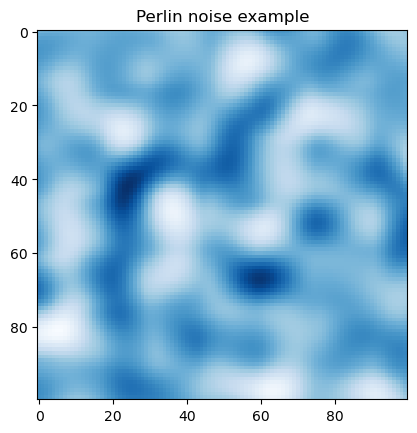

In [27]:
# Set the width, height, and scale parameters
width = 100
height = 100
scale = 15

# Generate the Perlin noise
noise = generate_perlin_noise(width, height, scale)

# Plot the Perlin noise
plot_noise(noise, "Perlin noise example", cmap_given = "Blues")